In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
data=pd.read_csv("C:/Users/97455/Downloads/train_ctrUa4K.csv")

In [95]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [96]:
data.shape

(614, 13)

In [97]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [98]:
data=data.replace(to_replace='3+',value=4)

In [99]:
# Splitting data into x and y

In [100]:
x=data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=data['Loan_Status']

In [101]:
x.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural


In [102]:
x_num=data.iloc[:][['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

In [103]:
x_cat=data.iloc[:][['Gender','Married','Education','Self_Employed','Credit_History','Property_Area']]

# Missing value treating

In [104]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
x_num1=imp.fit_transform(x_num)

In [105]:
x_num1

array([[0.00000000e+00, 5.84900000e+03, 0.00000000e+00, 1.46412162e+02,
        3.60000000e+02],
       [1.00000000e+00, 4.58300000e+03, 1.50800000e+03, 1.28000000e+02,
        3.60000000e+02],
       [0.00000000e+00, 3.00000000e+03, 0.00000000e+00, 6.60000000e+01,
        3.60000000e+02],
       ...,
       [1.00000000e+00, 8.07200000e+03, 2.40000000e+02, 2.53000000e+02,
        3.60000000e+02],
       [2.00000000e+00, 7.58300000e+03, 0.00000000e+00, 1.87000000e+02,
        3.60000000e+02],
       [0.00000000e+00, 4.58300000e+03, 0.00000000e+00, 1.33000000e+02,
        3.60000000e+02]])

In [106]:
x_num1=pd.DataFrame(x_num1,columns=x_num.columns)

# Visualization

In [107]:
x_num1['TotalIncome']=x_num1['ApplicantIncome']+x_num1['CoapplicantIncome']

<AxesSubplot:>

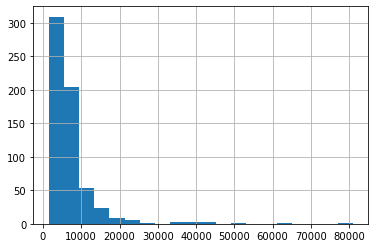

In [108]:
x_num1['TotalIncome'].hist(bins=20)

In [109]:
# Normalizing the data

In [110]:
x_num1['TotalIncome']=np.log(x_num1['TotalIncome'])

<AxesSubplot:>

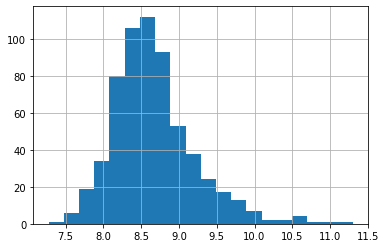

In [111]:
x_num1['TotalIncome'].hist(bins=20)

<AxesSubplot:>

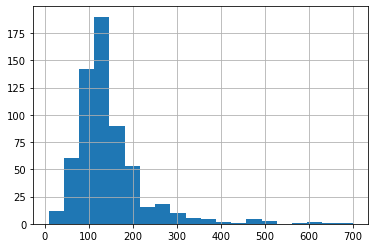

In [112]:
x_num1['LoanAmount'].hist(bins=20)

In [113]:
x_num1['LoanAmount']=np.log(x_num1['LoanAmount'])

<AxesSubplot:>

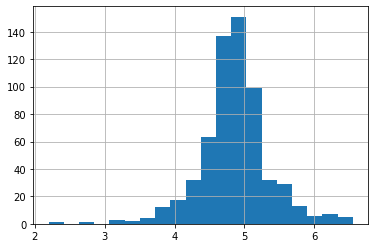

In [114]:
x_num1['LoanAmount'].hist(bins=20)

In [115]:
x_num1=pd.DataFrame(x_num1,columns=x_num.columns)

In [116]:
x_num1.isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

# Encoding categorical variables

In [117]:
x_cat.head(2)

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area
0,Male,No,Graduate,No,1.0,Urban
1,Male,Yes,Graduate,No,1.0,Rural


In [118]:
x_cat=pd.get_dummies(x_cat)
x_cat

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0,1,1,0,1,0,1,0,0,0,1
1,1.0,0,1,0,1,1,0,1,0,1,0,0
2,1.0,0,1,0,1,1,0,0,1,0,0,1
3,1.0,0,1,0,1,0,1,1,0,0,0,1
4,1.0,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,1,0,1,0,1,0,1,0,1,0,0
610,1.0,0,1,0,1,1,0,1,0,1,0,0
611,1.0,0,1,0,1,1,0,1,0,0,0,1
612,1.0,0,1,0,1,1,0,1,0,0,0,1


# Treating missing values

In [119]:
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
x_cat1=imp.fit_transform(x_cat)

In [120]:
x_cat1=pd.DataFrame(x_cat1,columns=x_cat.columns)

In [121]:
x_cat1.head(2)

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [122]:
x=pd.concat([x_cat1,x_num1],axis=1)

In [123]:
x.head(2)

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5849.0,0.0,4.986426,360.0
1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4583.0,1508.0,4.852030,360.0


In [124]:
x.isnull().sum()

Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
dtype: int64

# Encoding y variable

In [125]:
y=lb.fit_transform(y)

In [126]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [128]:
print("Shape of the training features is ", x_train.shape)
print("Shape of the training target is ", y_train.shape)
print("Shape of the testing features is ", x_test.shape)
print("Shape of the testing target is ", y_test.shape)

Shape of the training features is  (491, 17)
Shape of the training target is  (491,)
Shape of the testing features is  (123, 17)
Shape of the testing target is  (123,)


In [129]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [130]:
y_predtrain=dt.predict(x_train)
y_predtest=dt.predict(x_test)

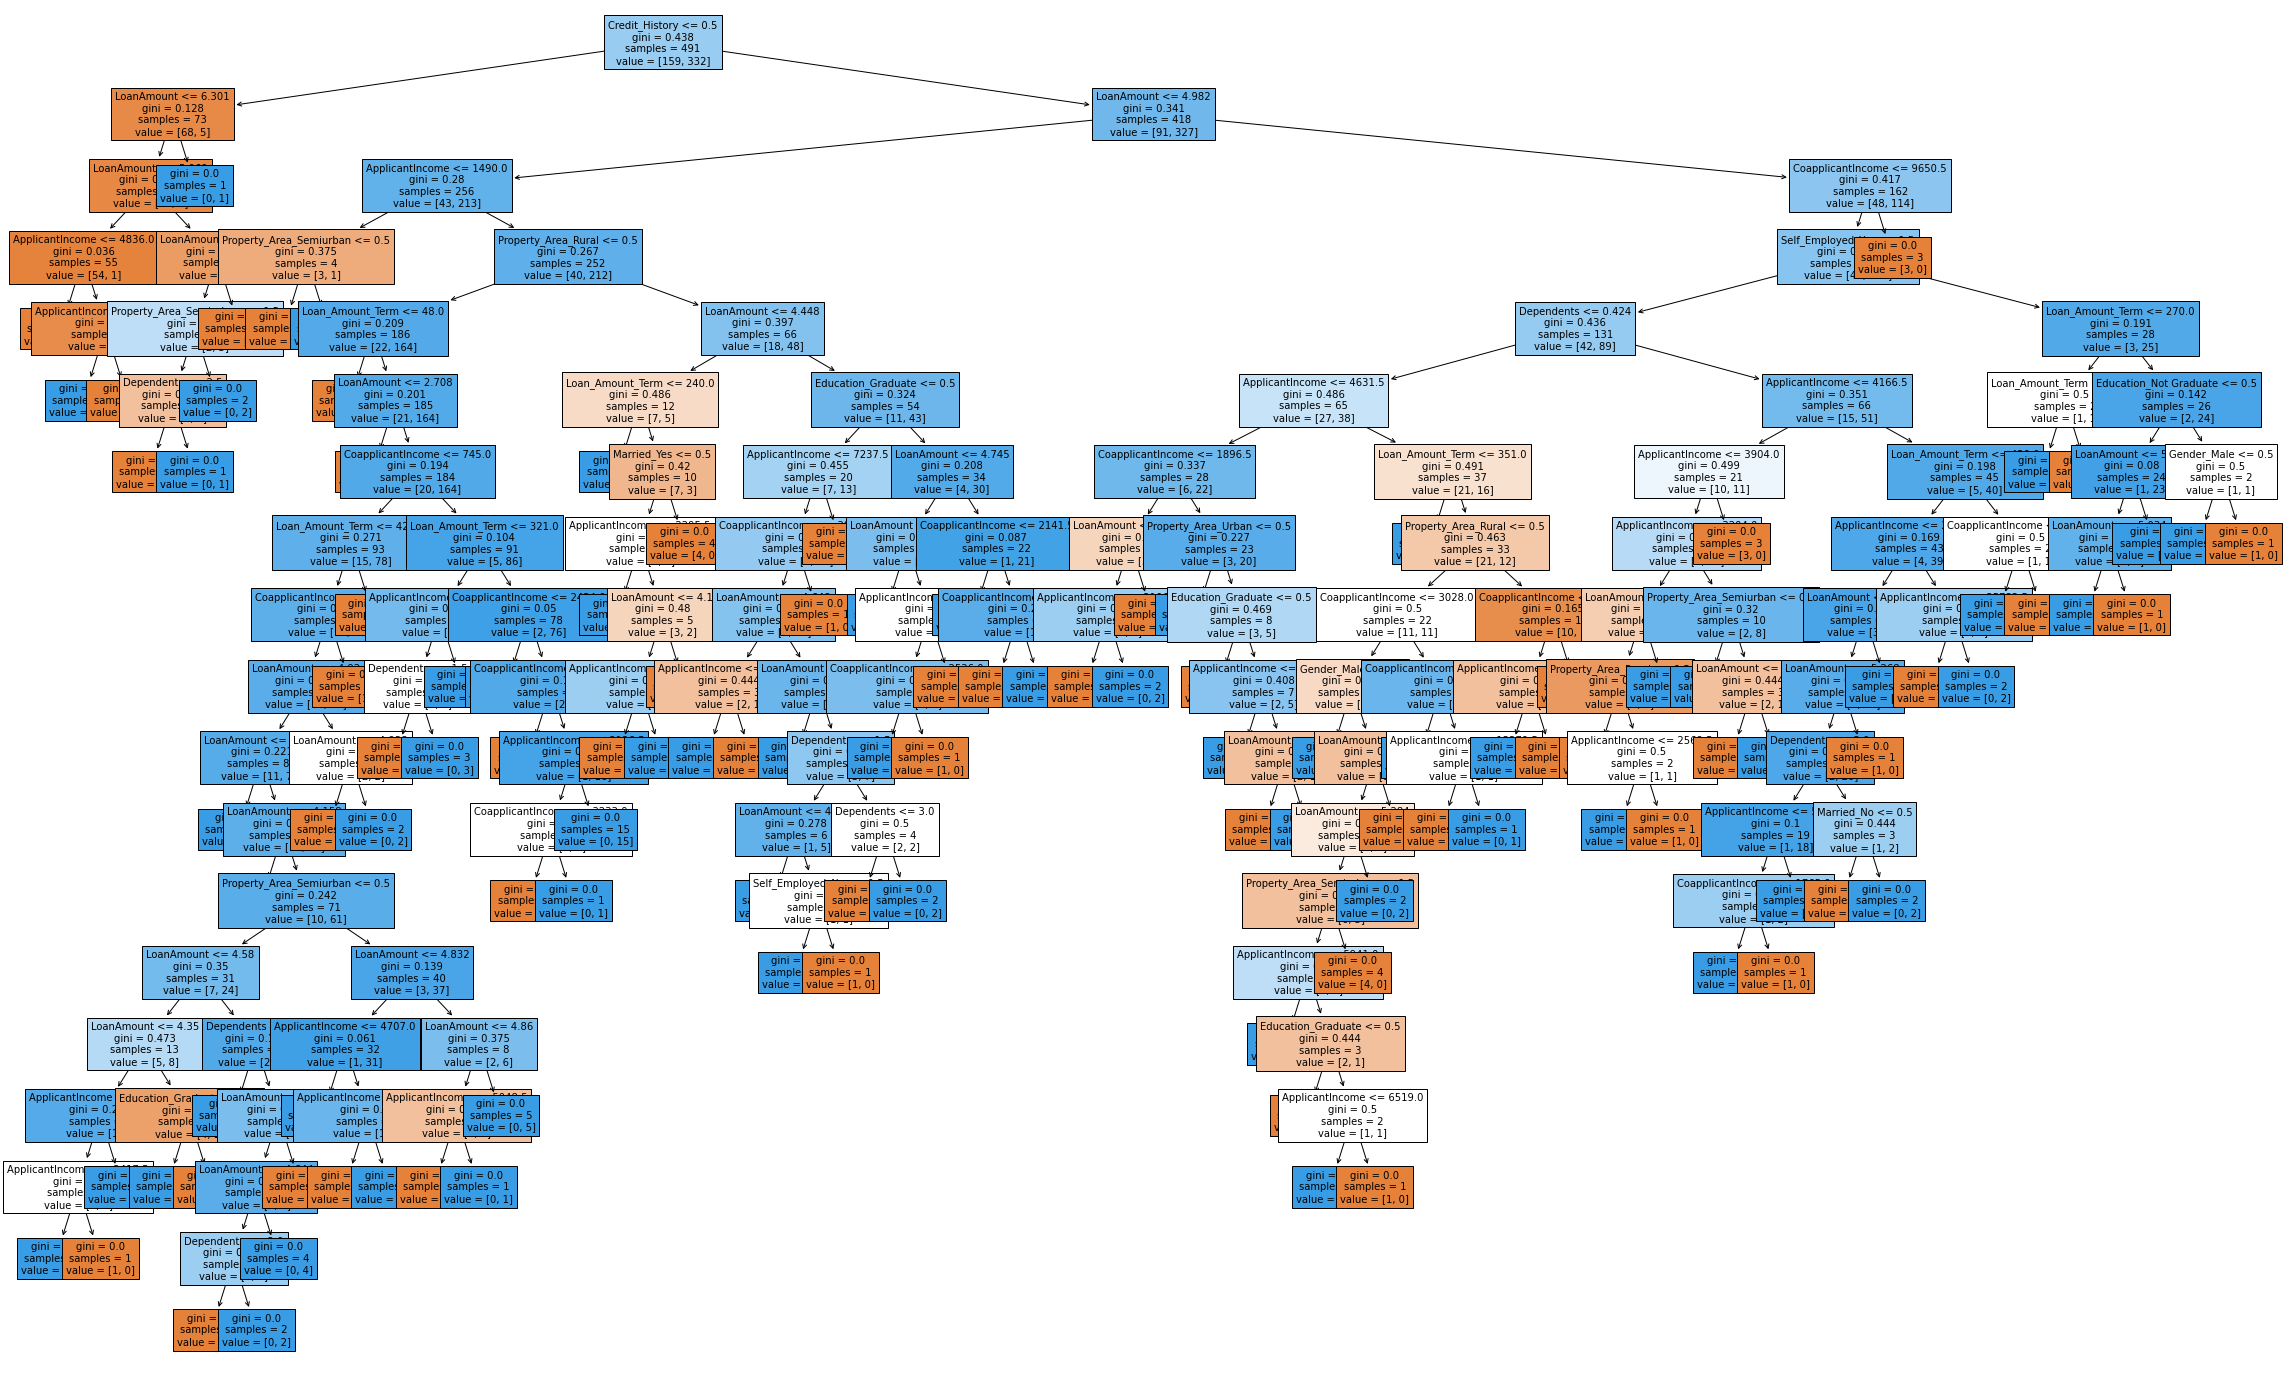

In [131]:
from sklearn import tree
plt.figure(figsize=(40,25))
tree.plot_tree(dt,feature_names=x.columns,filled=True,fontsize=10)
plt.show()

In [132]:
from sklearn.metrics import accuracy_score
print("The train data accuracy of the DT model is ",accuracy_score(y_train , y_predtrain))

The train data accuracy of the DT model is  1.0


In [134]:
print("The test data accuracy of the DT model is ",accuracy_score(y_test , y_predtest))

The test data accuracy of the DT model is  0.6829268292682927


In [135]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [136]:
y_predtest=nb.predict(x_test)

In [137]:
print("The test data accuracy of the naive bayes model is ",accuracy_score(y_test , y_predtest))

The test data accuracy of the naive bayes model is  0.8292682926829268


# Since the Naive Bayes test accuracy is better than Decision tree accuracy we choose Naive base 

# Importing testing data

In [290]:
data=pd.read_csv("C:/Users/97455/Downloads/Spark projects/Loan prediction/test_lAUu6dG.csv")

In [291]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [292]:
data.shape

(367, 12)

In [293]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [294]:
data=data.replace(to_replace='3+',value=4)

In [295]:
data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [296]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [297]:
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)

In [298]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [299]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [300]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

<AxesSubplot:>

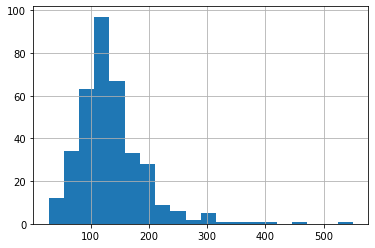

In [301]:
data['LoanAmount'].hist(bins=20)

In [302]:
data.LoanAmount=data.LoanAmount.fillna(data.LoanAmount.mean())

In [303]:
data['LoanAmount']=np.log(data['LoanAmount'])

<AxesSubplot:>

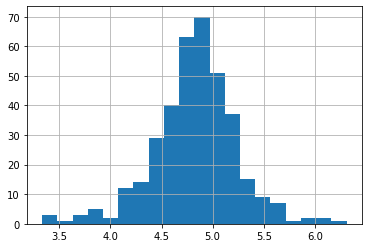

In [304]:
data['LoanAmount'].hist(bins=20)

In [305]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [306]:
data['TotalIncome']=data['ApplicantIncome']+data['CoapplicantIncome']

In [307]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,LP001015,Male,Yes,0,Graduate,No,5720,0,4.700480,360.0,1.0,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,4.836282,360.0,1.0,Urban,4576


In [308]:
data=data.drop(columns=['Loan_ID'],axis=1)

In [309]:
data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,Male,Yes,0,Graduate,No,5720,0,4.700480,360.0,1.0,Urban,5720
1,Male,Yes,1,Graduate,No,3076,1500,4.836282,360.0,1.0,Urban,4576


In [310]:
data_num=data.iloc[:][['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

In [311]:
data_cat=data.iloc[:][['Gender','Married','Education','Self_Employed','Credit_History','Property_Area']]

In [312]:
data_cat=pd.get_dummies(data_cat)
data_cat

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0,1,0,1,1,0,1,0,0,0,1
1,1.0,0,1,0,1,1,0,1,0,0,0,1
2,1.0,0,1,0,1,1,0,1,0,0,0,1
3,1.0,0,1,0,1,1,0,1,0,0,0,1
4,1.0,0,1,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,0,1,0,1,0,1,0,1,0,0,1
363,1.0,0,1,0,1,1,0,1,0,0,0,1
364,1.0,0,1,1,0,1,0,1,0,0,1,0
365,1.0,0,1,0,1,1,0,1,0,1,0,0


In [314]:
data=pd.concat([data_cat,data_num],axis=1)

In [315]:
data.head(2)

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,0,1,0,1,1,0,1,0,0,0,1,0,5720,0,4.700480,360.0
1,1.0,0,1,0,1,1,0,1,0,0,0,1,1,3076,1500,4.836282,360.0


In [316]:
pred=nb.predict(data)

In [317]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# Customer eligible for loan
#  Customer not Eligible for loan